# Kings County Housing Prices Predictor

## Project Overview

The data science team has been tasked with creating a model to accurately predict the pricing of a home in the Seattle, Washington area. Housing sales information for Kings County, Washington from May, 2014 to May, 2015. A number of attributes were recorded for each house sale during that time (including square footage, zipcode, etc.); the data science team is analyzing 19 of these traits to ultimately develop a linear model that will predict house pricing. Overall, the team will explore these 19 traits, engineer other helpful features from these traits, and then select the combination of all these features that leads to the most accurate linear model using regression testing. With this analysis, the team can answer the following three significant business questions about real estate pricing in the Seattle area: 

1. What housing feature is most beneficial to a house's selling price?
2. What housing feature is most harmful to a house's selling price?
3. What housing feature has the least effect on a house's selling price?

## Data Preparation and Exploratory Data Analysis (EDA)

As a first step, the data science team imports the housing data to be analyzed in csv format. All relevant Python packages are also imported. Some initial reformatting is done on the data the in order to allow it to be more easily manipulated (changing variable types, etc.). A snippet of the data can be seen below.

In [2]:
# Import relevant Python packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from datetime import datetime

# Import housing data
hdf=pd.read_csv("kc_house_data_train.csv")

# Reset index of data frame and change date datatype to datetime
hdf.reset_index(inplace=True)
hdf=hdf[['id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
hdf.set_index('id', inplace=True)
hdf['date']= pd.to_datetime(hdf['date'])

hdf.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


The team next begins general data exploration. In this part of the process, the main goal is for the team to begin to understand all variables present within the supplied information, as well as to find any inconsistencies that may exist.

The team first checks to make sure there are no null values present for any of the analyzed variables below:

In [3]:
# Check for null values in the data frame
hdf.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Seeing none, the team then moves on to plot every data point within each of the 19 analyzed traits along their respective unit magnitudes in order to see if there are outliers present. A graph is produced for each of the 19 traits, along with the target price, in order to allow the team to visually spot these outliers. As a reference, the x-axes for these graphs are essentially meaningless, as they only tell how many data points are in the overall set. The y-axes, however, will indicate magnitude of the data point in the relevant category's units.

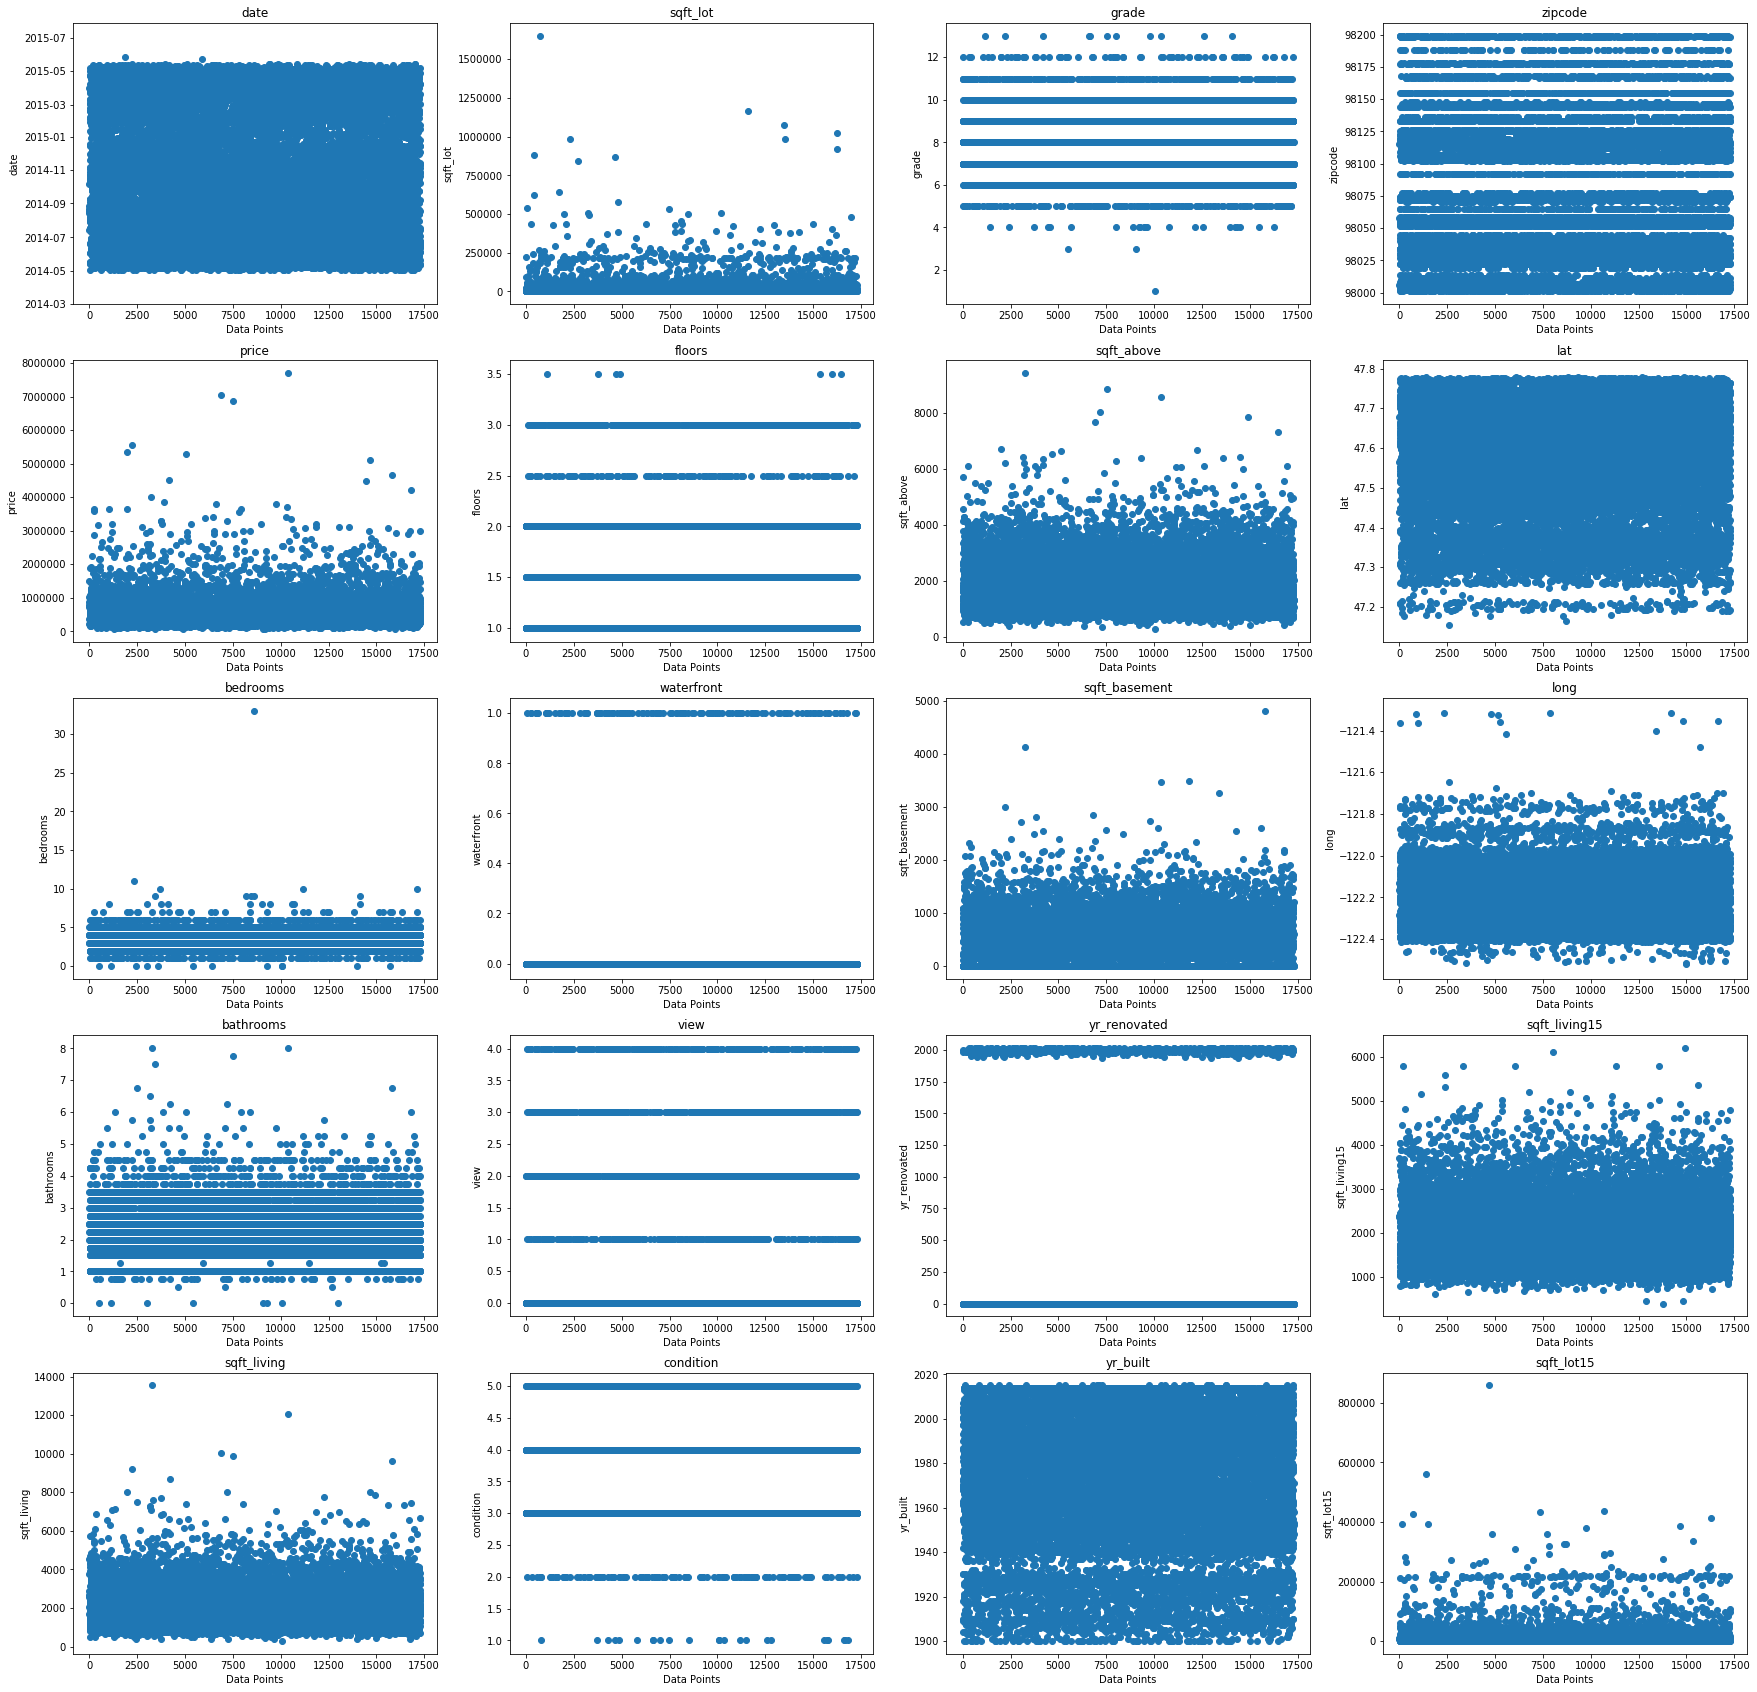

In [5]:
# Define x variable as the length of the data set
x=list(range(0,len(hdf.sqft_living)))

# Initiate subpot figure with a plot for each examined feature
figure, ax = plt.subplots(5, 4, figsize=(30, 30))

# Set titles for each graph
ax[0][0].set_title('date')
ax[1][0].set_title('price')
ax[2][0].set_title('bedrooms')
ax[3][0].set_title('bathrooms')
ax[4][0].set_title('sqft_living')
ax[0][1].set_title('sqft_lot')
ax[1][1].set_title('floors')
ax[2][1].set_title('waterfront')
ax[3][1].set_title('view')
ax[4][1].set_title('condition')
ax[0][2].set_title('grade')
ax[1][2].set_title('sqft_above')
ax[2][2].set_title('sqft_basement')
ax[3][2].set_title('yr_renovated')
ax[4][2].set_title('yr_built')
ax[0][3].set_title('zipcode')
ax[1][3].set_title('lat')
ax[2][3].set_title('long')
ax[3][3].set_title('sqft_living15')
ax[4][3].set_title('sqft_lot15')

# Set x labels
ax[0][0].set_xlabel('Data Points')
ax[1][0].set_xlabel('Data Points')
ax[2][0].set_xlabel('Data Points')
ax[3][0].set_xlabel('Data Points')
ax[4][0].set_xlabel('Data Points')
ax[0][1].set_xlabel('Data Points')
ax[1][1].set_xlabel('Data Points')
ax[2][1].set_xlabel('Data Points')
ax[3][1].set_xlabel('Data Points')
ax[4][1].set_xlabel('Data Points')
ax[0][2].set_xlabel('Data Points')
ax[1][2].set_xlabel('Data Points')
ax[2][2].set_xlabel('Data Points')
ax[3][2].set_xlabel('Data Points')
ax[4][2].set_xlabel('Data Points')
ax[0][3].set_xlabel('Data Points')
ax[1][3].set_xlabel('Data Points')
ax[2][3].set_xlabel('Data Points')
ax[3][3].set_xlabel('Data Points')
ax[4][3].set_xlabel('Data Points')

# Set y labels
ax[0][0].set_ylabel('date')
ax[1][0].set_ylabel('price')
ax[2][0].set_ylabel('bedrooms')
ax[3][0].set_ylabel('bathrooms')
ax[4][0].set_ylabel('sqft_living')
ax[0][1].set_ylabel('sqft_lot')
ax[1][1].set_ylabel('floors')
ax[2][1].set_ylabel('waterfront')
ax[3][1].set_ylabel('view')
ax[4][1].set_ylabel('condition')
ax[0][2].set_ylabel('grade')
ax[1][2].set_ylabel('sqft_above')
ax[2][2].set_ylabel('sqft_basement')
ax[3][2].set_ylabel('yr_renovated')
ax[4][2].set_ylabel('yr_built')
ax[0][3].set_ylabel('zipcode')
ax[1][3].set_ylabel('lat')
ax[2][3].set_ylabel('long')
ax[3][3].set_ylabel('sqft_living15')
ax[4][3].set_ylabel('sqft_lot15')

# Graph the twenty plots
ax[0][0].scatter(x, hdf.date)
ax[1][0].scatter(x, hdf.price)
ax[2][0].scatter(x, hdf.bedrooms)
ax[3][0].scatter(x, hdf.bathrooms)
ax[4][0].scatter(x, hdf.sqft_living)
ax[0][1].scatter(x, hdf.sqft_lot)
ax[1][1].scatter(x, hdf.floors)
ax[2][1].scatter(x, hdf.waterfront)
ax[3][1].scatter(x, hdf.view)
ax[4][1].scatter(x, hdf.condition)
ax[0][2].scatter(x, hdf.grade)
ax[1][2].scatter(x, hdf.sqft_above)
ax[2][2].scatter(x, hdf.sqft_basement)
ax[3][2].scatter(x, hdf.yr_renovated)
ax[4][2].scatter(x, hdf.yr_built)
ax[0][3].scatter(x, hdf.zipcode)
ax[1][3].scatter(x, hdf.lat)
ax[2][3].scatter(x, hdf.long)
ax[3][3].scatter(x, hdf.sqft_living15)
ax[4][3].scatter(x, hdf.sqft_lot15)

When observing these plots, a few features seem to have a handful of outliers. Specifically 'sqft_living' (the square footage of the house's living space), 'sqft_living15' (the square footage of the house's nearest 15 neighbors), 'sqft_lot' (square footage of the house's lot), 'sqft_lot15' (square footage of the lots of the house's nearest 15 neighbors), 'bedrooms' (number of bedrooms in the house), and 'bathrooms' (number of bathrooms in the house). As a note, sqft_above (Realizing that there are over 17000 points in the data set and that, most often, the outliers visually identified in these graphs number in the 10's, cutoff points for variables were determined just by inspection of each graph. When a data point was above any of these thresholds, the magnitude of the data point was set at the upper quartile of the relevant feature's data; the team wants to still consider these points as high, relative to the rest of the data set to which it belongs, but just not so high such that it skews regression. Implementation of these thresholds can be seen below.

In [117]:
# For each outlier-laden feature, all data points above established threshold
# are set to that feature's upper quartile value.
hdf.sqft_living = np.where(hdf.sqft_living<=5000, hdf.sqft_living, hdf.sqft_living.quantile([0.75]))
hdf.sqft_living15 = np.where(hdf.sqft_living15<=4000, hdf.sqft_living15, hdf.sqft_living15.quantile([0.75]))
hdf.sqft_lot = np.where(hdf.sqft_lot<=250000, hdf.sqft_lot, hdf.sqft_lot.quantile([0.75]))
hdf.sqft_lot15 = np.where(hdf.sqft_lot15<=230000, hdf.sqft_lot15, hdf.sqft_lot15.quantile([0.75]))
hdf.bedrooms = np.where(hdf.bedrooms<=10, hdf.bedrooms, hdf.bedrooms.quantile([0.75]))
hdf.bathrooms = np.where(hdf.bathrooms<=6, hdf.bathrooms, hdf.bathrooms.quantile([0.75]))

All features are then re-plotted to confirm that outliers have been effectively dealt with. These graphs are seen below.

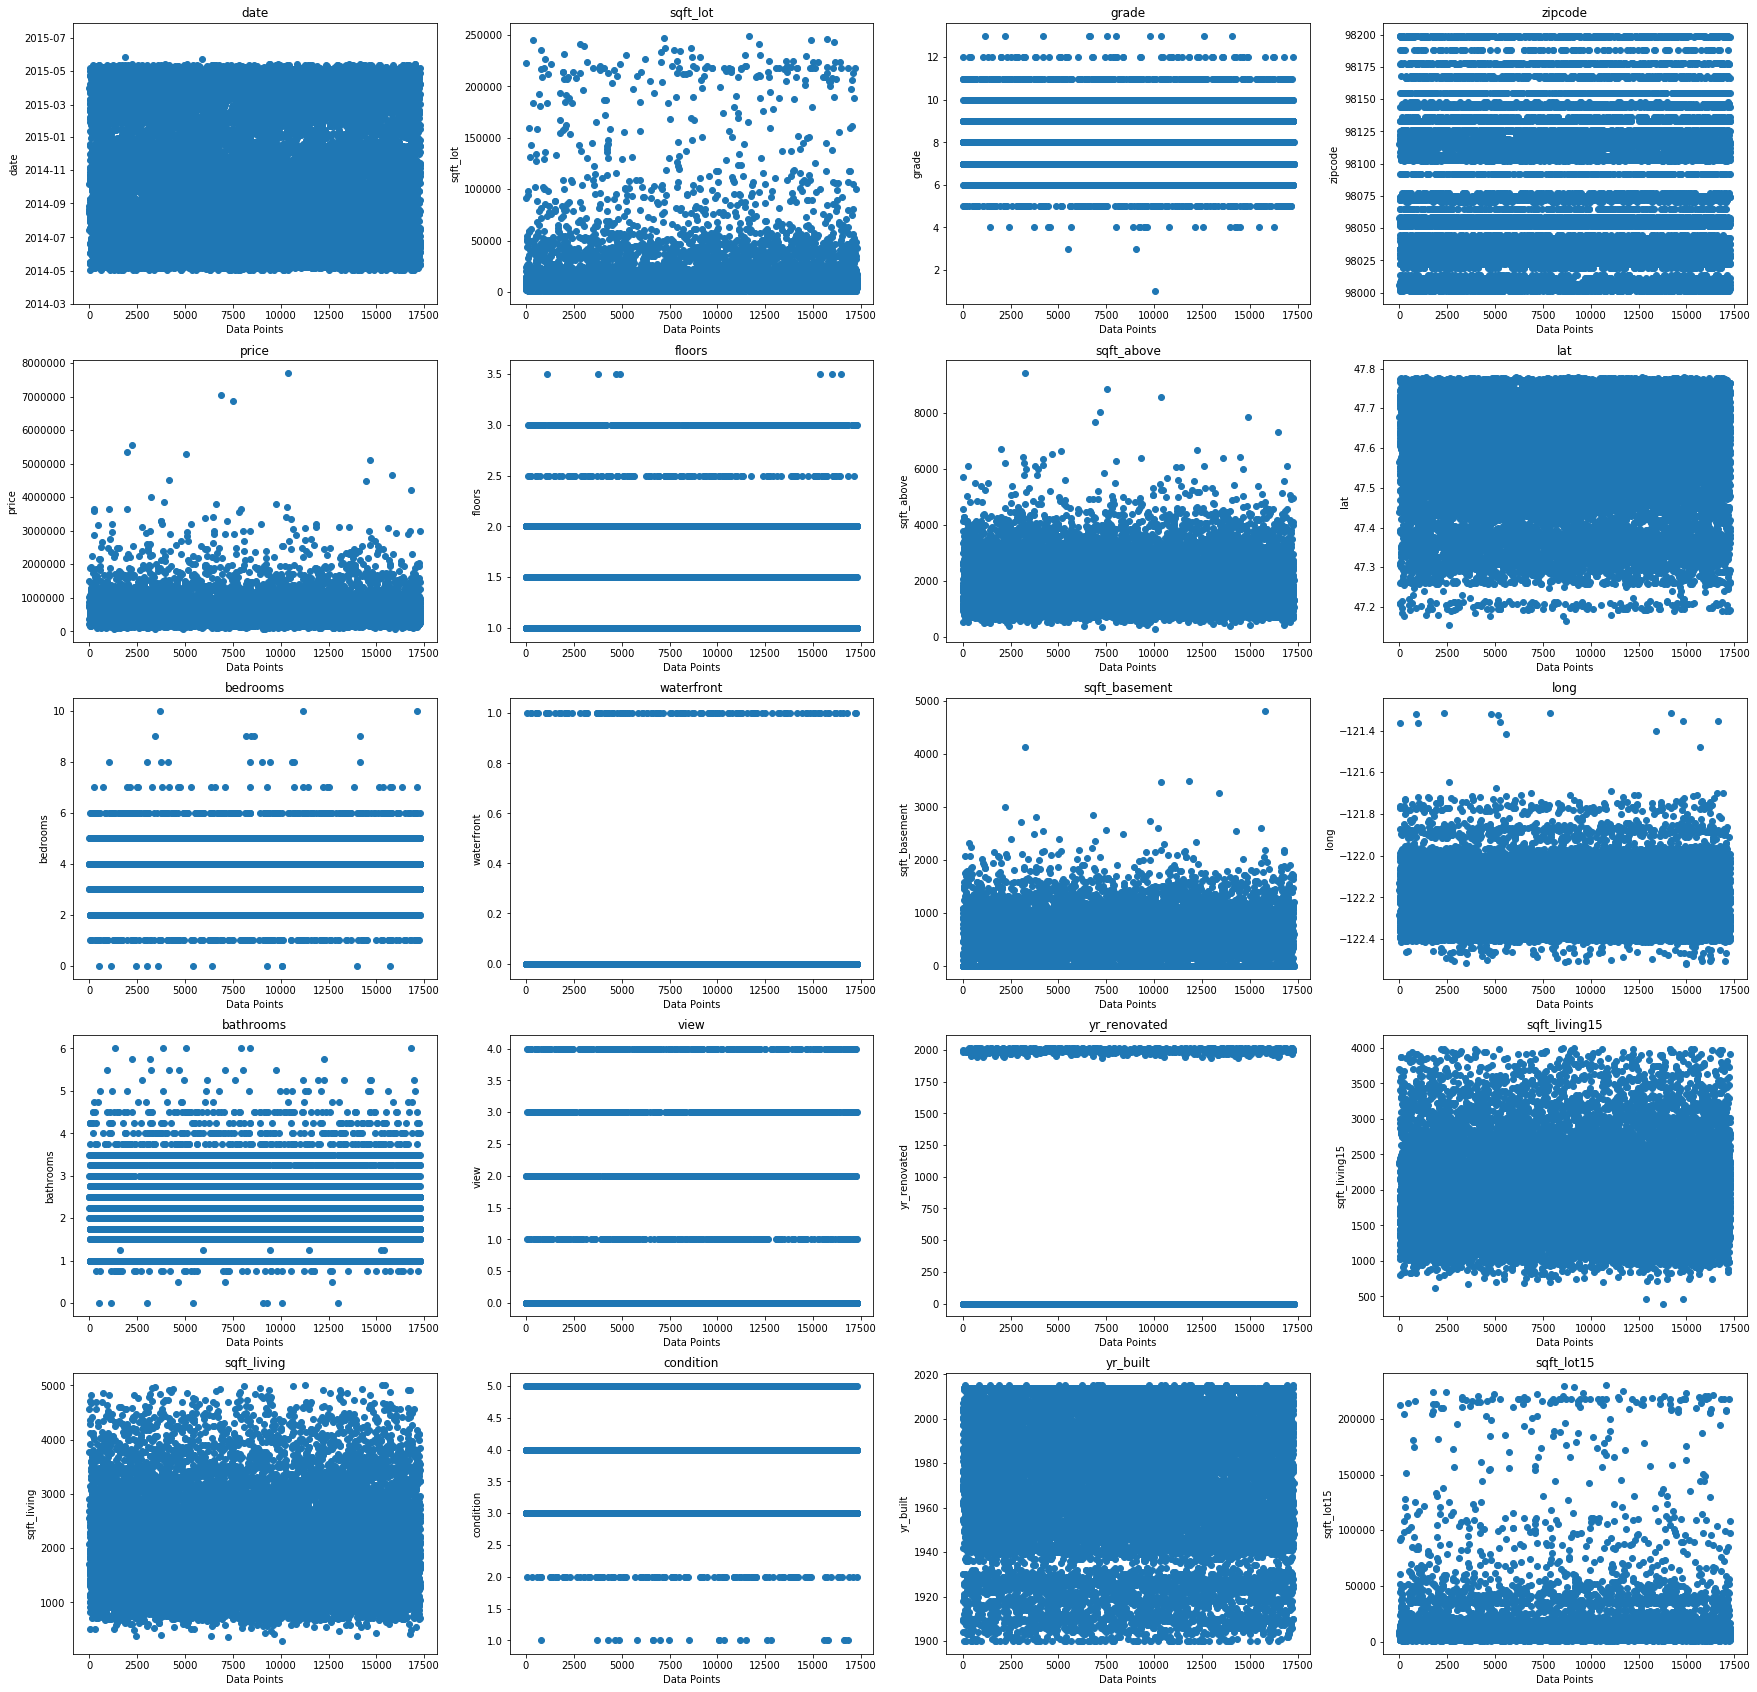

In [118]:
# Define x variable as the length of the data set
x=list(range(0,len(hdf.sqft_living)))

# Initiate subpot figure with a plot for each examined feature
figure, ax = plt.subplots(5, 4, figsize=(30, 30))

# Set titles for each graph
ax[0][0].set_title('date')
ax[1][0].set_title('price')
ax[2][0].set_title('bedrooms')
ax[3][0].set_title('bathrooms')
ax[4][0].set_title('sqft_living')
ax[0][1].set_title('sqft_lot')
ax[1][1].set_title('floors')
ax[2][1].set_title('waterfront')
ax[3][1].set_title('view')
ax[4][1].set_title('condition')
ax[0][2].set_title('grade')
ax[1][2].set_title('sqft_above')
ax[2][2].set_title('sqft_basement')
ax[3][2].set_title('yr_renovated')
ax[4][2].set_title('yr_built')
ax[0][3].set_title('zipcode')
ax[1][3].set_title('lat')
ax[2][3].set_title('long')
ax[3][3].set_title('sqft_living15')
ax[4][3].set_title('sqft_lot15')

# Set x labels
ax[0][0].set_xlabel('Data Points')
ax[1][0].set_xlabel('Data Points')
ax[2][0].set_xlabel('Data Points')
ax[3][0].set_xlabel('Data Points')
ax[4][0].set_xlabel('Data Points')
ax[0][1].set_xlabel('Data Points')
ax[1][1].set_xlabel('Data Points')
ax[2][1].set_xlabel('Data Points')
ax[3][1].set_xlabel('Data Points')
ax[4][1].set_xlabel('Data Points')
ax[0][2].set_xlabel('Data Points')
ax[1][2].set_xlabel('Data Points')
ax[2][2].set_xlabel('Data Points')
ax[3][2].set_xlabel('Data Points')
ax[4][2].set_xlabel('Data Points')
ax[0][3].set_xlabel('Data Points')
ax[1][3].set_xlabel('Data Points')
ax[2][3].set_xlabel('Data Points')
ax[3][3].set_xlabel('Data Points')
ax[4][3].set_xlabel('Data Points')

# Set y labels
ax[0][0].set_ylabel('date')
ax[1][0].set_ylabel('price')
ax[2][0].set_ylabel('bedrooms')
ax[3][0].set_ylabel('bathrooms')
ax[4][0].set_ylabel('sqft_living')
ax[0][1].set_ylabel('sqft_lot')
ax[1][1].set_ylabel('floors')
ax[2][1].set_ylabel('waterfront')
ax[3][1].set_ylabel('view')
ax[4][1].set_ylabel('condition')
ax[0][2].set_ylabel('grade')
ax[1][2].set_ylabel('sqft_above')
ax[2][2].set_ylabel('sqft_basement')
ax[3][2].set_ylabel('yr_renovated')
ax[4][2].set_ylabel('yr_built')
ax[0][3].set_ylabel('zipcode')
ax[1][3].set_ylabel('lat')
ax[2][3].set_ylabel('long')
ax[3][3].set_ylabel('sqft_living15')
ax[4][3].set_ylabel('sqft_lot15')

# Graph the twenty plots
ax[0][0].scatter(x, hdf.date)
ax[1][0].scatter(x, hdf.price)
ax[2][0].scatter(x, hdf.bedrooms)
ax[3][0].scatter(x, hdf.bathrooms)
ax[4][0].scatter(x, hdf.sqft_living)
ax[0][1].scatter(x, hdf.sqft_lot)
ax[1][1].scatter(x, hdf.floors)
ax[2][1].scatter(x, hdf.waterfront)
ax[3][1].scatter(x, hdf.view)
ax[4][1].scatter(x, hdf.condition)
ax[0][2].scatter(x, hdf.grade)
ax[1][2].scatter(x, hdf.sqft_above)
ax[2][2].scatter(x, hdf.sqft_basement)
ax[3][2].scatter(x, hdf.yr_renovated)
ax[4][2].scatter(x, hdf.yr_built)
ax[0][3].scatter(x, hdf.zipcode)
ax[1][3].scatter(x, hdf.lat)
ax[2][3].scatter(x, hdf.long)
ax[3][3].scatter(x, hdf.sqft_living15)
ax[4][3].scatter(x, hdf.sqft_lot15)

With outliers out of the way, the data science team now plots each one of the 19 features against price in order to determine already if certain relationships can be visually identified in each graph. This inspection will just give the team a sense of whether or not certain variables should be especially focused on or immediately dismissed. These graphs can be seen below.

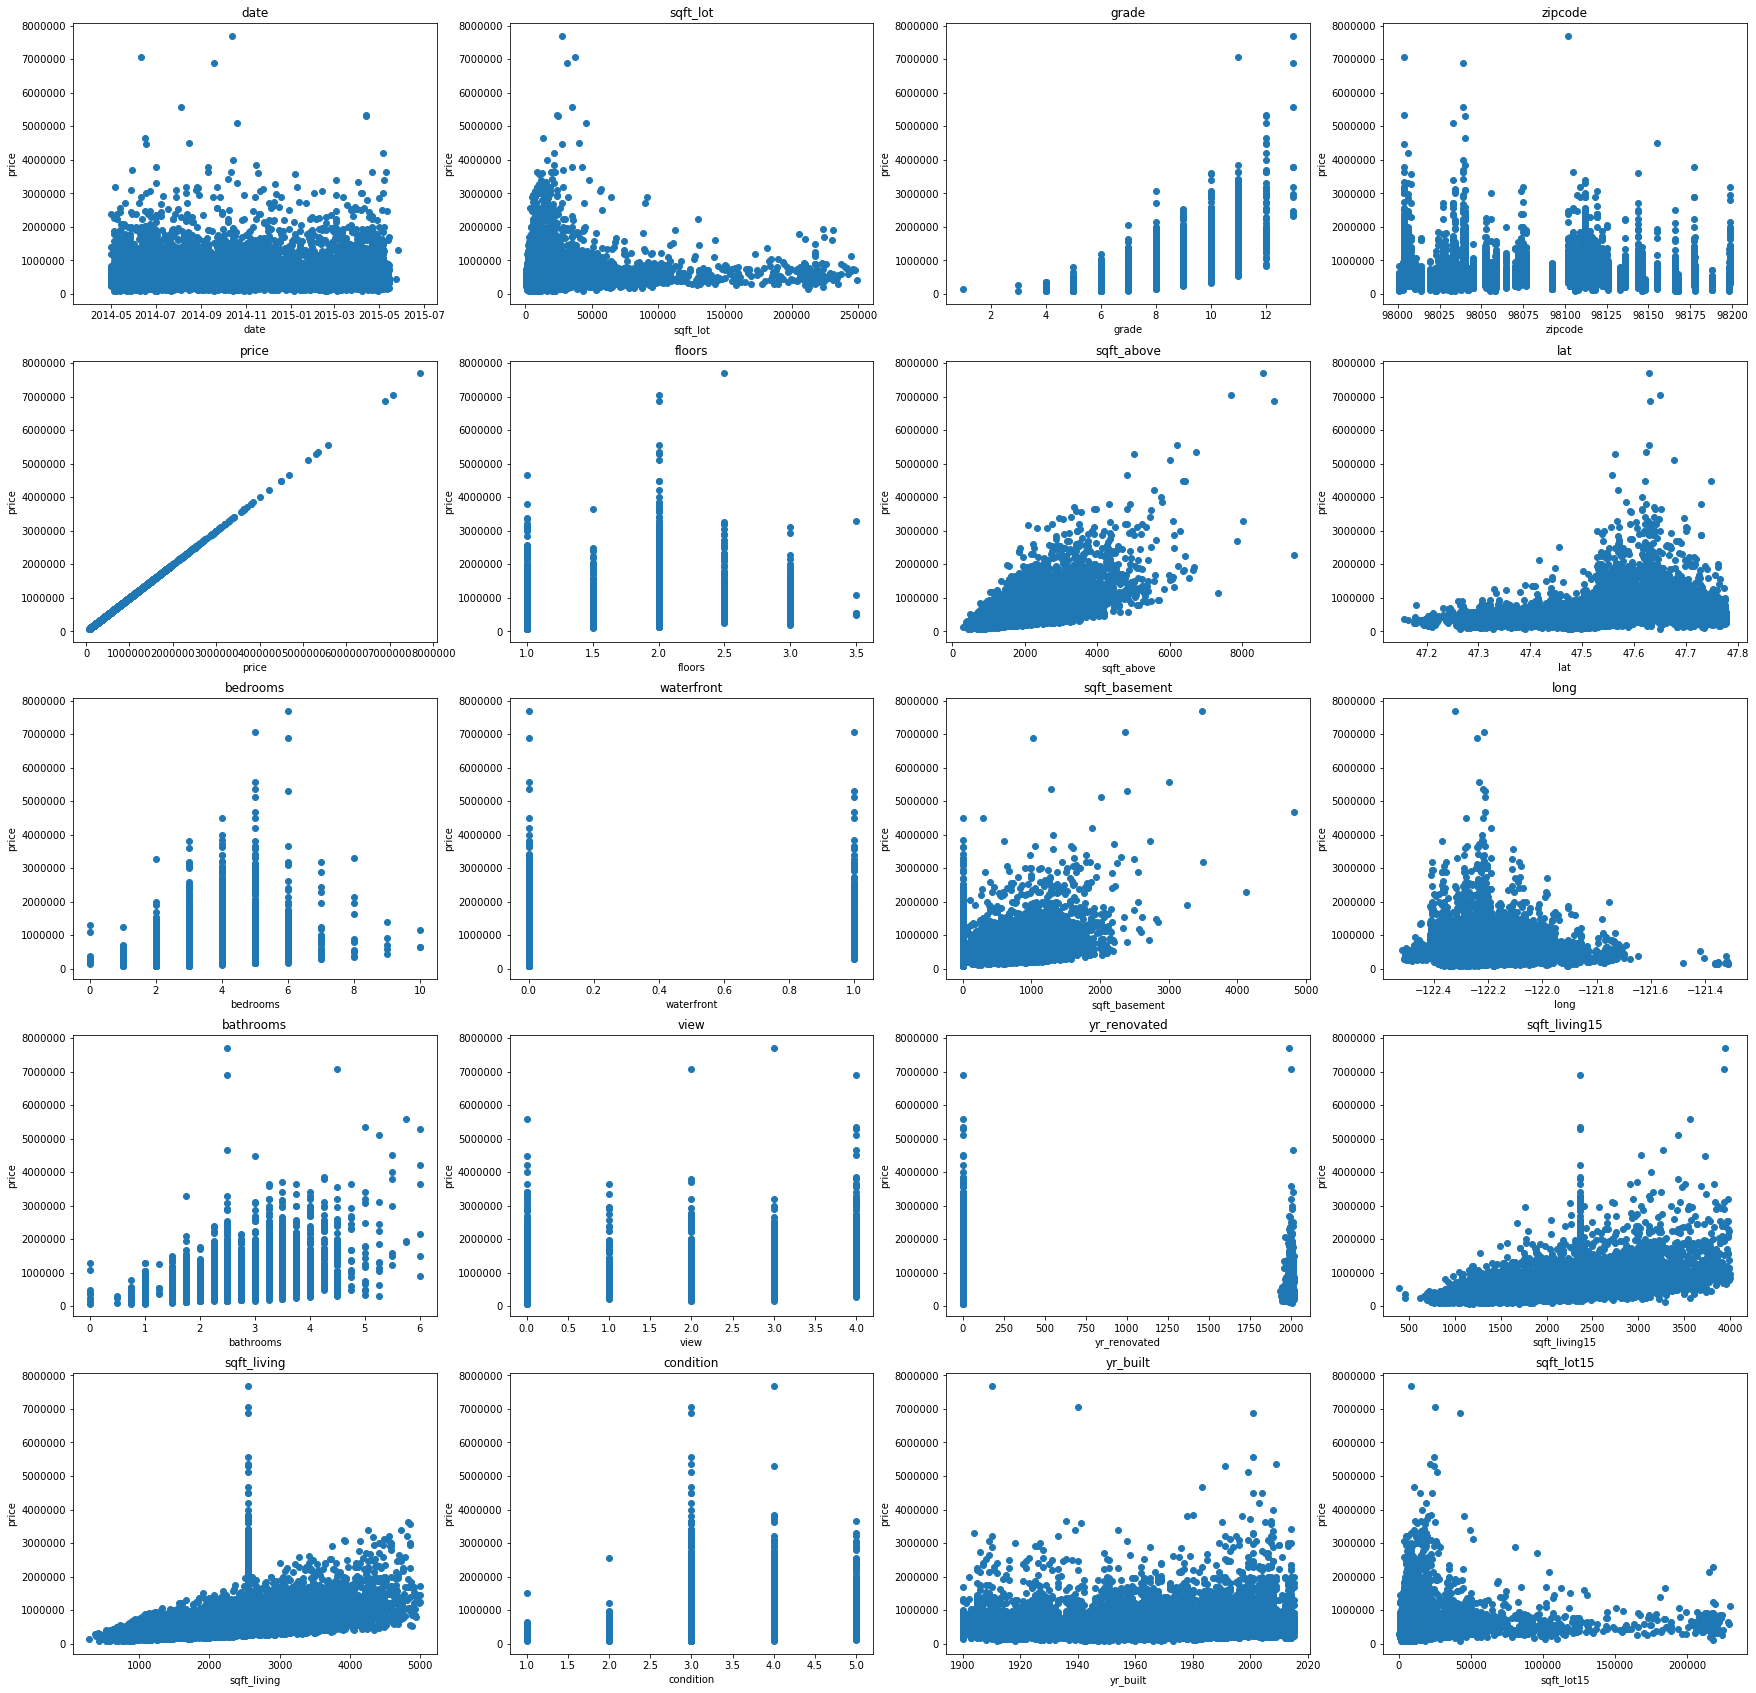

In [119]:
# Define x variable as the length of the data set
x=list(range(0,len(hdf.sqft_living)))

# Initiate subpot figure with a plot for each examined feature
figure, ax = plt.subplots(5, 4, figsize=(30, 30))

# Set titles for each graph
ax[0][0].set_title('date')
ax[1][0].set_title('price')
ax[2][0].set_title('bedrooms')
ax[3][0].set_title('bathrooms')
ax[4][0].set_title('sqft_living')
ax[0][1].set_title('sqft_lot')
ax[1][1].set_title('floors')
ax[2][1].set_title('waterfront')
ax[3][1].set_title('view')
ax[4][1].set_title('condition')
ax[0][2].set_title('grade')
ax[1][2].set_title('sqft_above')
ax[2][2].set_title('sqft_basement')
ax[3][2].set_title('yr_renovated')
ax[4][2].set_title('yr_built')
ax[0][3].set_title('zipcode')
ax[1][3].set_title('lat')
ax[2][3].set_title('long')
ax[3][3].set_title('sqft_living15')
ax[4][3].set_title('sqft_lot15')

# Set x labels
ax[0][0].set_xlabel('date')
ax[1][0].set_xlabel('price')
ax[2][0].set_xlabel('bedrooms')
ax[3][0].set_xlabel('bathrooms')
ax[4][0].set_xlabel('sqft_living')
ax[0][1].set_xlabel('sqft_lot')
ax[1][1].set_xlabel('floors')
ax[2][1].set_xlabel('waterfront')
ax[3][1].set_xlabel('view')
ax[4][1].set_xlabel('condition')
ax[0][2].set_xlabel('grade')
ax[1][2].set_xlabel('sqft_above')
ax[2][2].set_xlabel('sqft_basement')
ax[3][2].set_xlabel('yr_renovated')
ax[4][2].set_xlabel('yr_built')
ax[0][3].set_xlabel('zipcode')
ax[1][3].set_xlabel('lat')
ax[2][3].set_xlabel('long')
ax[3][3].set_xlabel('sqft_living15')
ax[4][3].set_xlabel('sqft_lot15')

# Set y labels
ax[0][0].set_ylabel('price')
ax[1][0].set_ylabel('price')
ax[2][0].set_ylabel('price')
ax[3][0].set_ylabel('price')
ax[4][0].set_ylabel('price')
ax[0][1].set_ylabel('price')
ax[1][1].set_ylabel('price')
ax[2][1].set_ylabel('price')
ax[3][1].set_ylabel('price')
ax[4][1].set_ylabel('price')
ax[0][2].set_ylabel('price')
ax[1][2].set_ylabel('price')
ax[2][2].set_ylabel('price')
ax[3][2].set_ylabel('price')
ax[4][2].set_ylabel('price')
ax[0][3].set_ylabel('price')
ax[1][3].set_ylabel('price')
ax[2][3].set_ylabel('price')
ax[3][3].set_ylabel('price')
ax[4][3].set_ylabel('price')

# Graph the twenty plots
ax[0][0].scatter(hdf.date, hdf.price)
ax[1][0].scatter(hdf.price, hdf.price)
ax[2][0].scatter(hdf.bedrooms, hdf.price)
ax[3][0].scatter(hdf.bathrooms, hdf.price)
ax[4][0].scatter(hdf.sqft_living, hdf.price)
ax[0][1].scatter(hdf.sqft_lot, hdf.price)
ax[1][1].scatter(hdf.floors, hdf.price)
ax[2][1].scatter(hdf.waterfront, hdf.price)
ax[3][1].scatter(hdf.view, hdf.price)
ax[4][1].scatter(hdf.condition, hdf.price)
ax[0][2].scatter(hdf.grade, hdf.price)
ax[1][2].scatter(hdf.sqft_above, hdf.price)
ax[2][2].scatter(hdf.sqft_basement, hdf.price)
ax[3][2].scatter(hdf.yr_renovated, hdf.price)
ax[4][2].scatter(hdf.yr_built, hdf.price)
ax[0][3].scatter(hdf.zipcode, hdf.price)
ax[1][3].scatter(hdf.lat, hdf.price)
ax[2][3].scatter(hdf.long, hdf.price)
ax[3][3].scatter(hdf.sqft_living15, hdf.price)
ax[4][3].scatter(hdf.sqft_lot15, hdf.price)

Overall, each graph seems reasonably telling, in terms of strong or weak correlations between the respective feature and target price. For instance, just visually, it seems like date does not have much of an impact on sale price, whereas there seems to be a positive correlation between living square footage and sale price. After inspection, there is no immediate evidence that any particular feature should explicitly be precluded from analysis. However, it is interesting to individually view the target price graph plotted against itself, which can be seen below.

Text(0.5, 1.0, 'Price vs. Price')

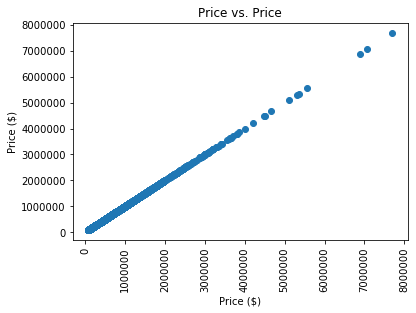

In [120]:
# Plot price against itself
plt.scatter(hdf.price, hdf.price)

# Set graph labels and title
plt.xlabel('Price ($)')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.title('Price vs. Price')

It can be derived from visual inspection that above housing prices of roughly $4,000,000, data points become much more sparsely grouped. This should serve as an indication and caution to the data science team that there are some outliers within the target price data set. No immediate action need be taken, but the team recognizes that it may be difficult to account for these outlier points with the model.

## Feature Engineering

Having gone through a preliminary analysis of the data, now the data science team looks to augment the original data set with extra indicators, derived from already existing features, that may ultimately improve linear fit to the data set and therefore accuracy of the overall model.

The team first chooses to separate the categorical variable 'condition' (overall condition rating of the house) into its corresponding values. This will allow the team to better observe the effect of this feature on price. As a result, 'condition' will change from being just one column in the data set to having a column for each individual rating as a boolean. Code to achieve this transormation below.

In [121]:
# Import relevant packages for variable transformation
try:
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder

# Change condition to a string variable to allow for manipulation
hdf.condition=hdf.condition.map(lambda x: str(x))

# Split condition variable from the rest of the data set
housing_no_cond = hdf.drop('condition', axis=1)
housing_cond = hdf[['condition']]

# Instantiate variable encoder and fit to condition variable
cat_encoder = OneHotEncoder()
housing_cond_1hot = cat_encoder.fit_transform(housing_cond)

# Change variable into a boolean array
housing_cond_1hot.toarray()
X = np.c_[(housing_no_cond, housing_cond_1hot.toarray())]

# Join boolean array with rest of data set
cols = housing_no_cond.columns.tolist() +cat_encoder.categories_[0].tolist()
hdf_cat = pd.DataFrame(X, columns=cols)

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


The team then goes through the same process with another categorical variable, zipcode. This code is suspected to be crucial to analysis of the data, as anecdotally, location heavily influences real estate pricing.

In [122]:
# Split zipcode variable from the rest of the data set
housing_no_zip = hdf_cat.drop('zipcode', axis=1)
housing_zip = hdf_cat[['zipcode']]

# Instantiate variable encoder and fit to condition variable
zip_encoder = OneHotEncoder()
housing_zip_1hot = zip_encoder.fit_transform(housing_zip)

# Change variable into a boolean array
housing_zip_1hot.toarray()
X = np.c_[(housing_no_zip, housing_zip_1hot.toarray())]

# Join boolean array with rest of data set
cols = housing_no_zip.columns.tolist() +zip_encoder.categories_[0].tolist()
hdf_cat2 = pd.DataFrame(X, columns=cols)

# Rename columns to all strings to allow for easier manipulation later
hdf_cat2.columns
column_fix=[         'date',         'price',      'bedrooms',     'bathrooms',
         'sqft_living',      'sqft_lot',        'floors',    'waterfront',
                'view',         'grade',    'sqft_above', 'sqft_basement',
            'yr_built',  'yr_renovated',           'lat',          'long',
       'sqft_living15',    'sqft_lot15',             'condition_1',             'condition_2',
                   'condition_3',             'condition_4',             'condition_5',         'zip_98001',
               'zip_98002',         'zip_98003',         'zip_98004',         'zip_98005',
               'zip_98006',         'zip_98007',         'zip_98008',         'zip_98010',
               'zip_98011',         'zip_98014',         'zip_98019',         'zip_98022',
               'zip_98023',         'zip_98024',         'zip_98027',         'zip_98028',
               'zip_98029',         'zip_98030',         'zip_98031',         'zip_98032',
               'zip_98033',         'zip_98034',         'zip_98038',         'zip_98039',
               'zip_98040',         'zip_98042',         'zip_98045',         'zip_98052',
               'zip_98053',         'zip_98055',         'zip_98056',         'zip_98058',
               'zip_98059',         'zip_98065',         'zip_98070',         'zip_98072',
               'zip_98074',         'zip_98075',         'zip_98077',         'zip_98092',
               'zip_98102',         'zip_98103',         'zip_98105',         'zip_98106',
               'zip_98107',         'zip_98108',         'zip_98109',         'zip_98112',
               'zip_98115',         'zip_98116',         'zip_98117',         'zip_98118',
               'zip_98119',         'zip_98122',         'zip_98125',         'zip_98126',
               'zip_98133',         'zip_98136',         'zip_98144',         'zip_98146',
               'zip_98148',         'zip_98155',         'zip_98166',         'zip_98168',
               'zip_98177',         'zip_98178',         'zip_98188',         'zip_98198',
               'zip_98199']
hdf_cat2.columns=column_fix

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


The team also identifies date as a continuous variable with potentially cyclical effect on the pricing of house sales (since calendars repeat themselves). As such, it makes sense to group these dates by time of year. The team decided to decompose this variable into the corresponding months of house sale. Realizing month of sale is also a categorical variable, the team further expanded this feature, similar to those above, into boolean variables for each individual month. That expansion can be seen below.

In [123]:
# Create string month dictionary for lookup of month datetime value
month_dict={'1':"Jan", '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul',
           '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}

# Create new column in data frame with month information
hdf_cat2['month']=hdf_cat.date.map(lambda x: month_dict[str(x.month)])

# Split month variable from the rest of the data set
housing_no_month = hdf_cat2.drop('month', axis=1)
housing_month = hdf_cat2[['month']]

# Instantiate variable encoder and fit to condition variable
month_encoder = OneHotEncoder()
housing_month_1hot = month_encoder.fit_transform(housing_month)

# Change variable into a boolean array
housing_month_1hot.toarray()
X = np.c_[(housing_no_month, housing_month_1hot.toarray())]

# Join boolean array with rest of data set
cols = housing_no_month.columns.tolist() +month_encoder.categories_[0].tolist()
hdf_cat2 = pd.DataFrame(X, columns=cols)

# Remove date, as we've turned into another variable
hdf_cat2=hdf_cat2.drop(columns=['date'])




The team identifies another opportunity for a combined variable that may lead to a better model, specifically in the combination of the 'yr_built' (the year the house was built) and 'yr_renovated' (the year the house was renovated) columns. The important observation here is that not all houses have been renovated; if not renovated, houses have a 'yr_renovated' value of zero. Overall, the most important data offered by both of these columns is *the last time the house had substantial work done by a construction crew*. This will give a sort of indicator as to how modern the house is. If never renovated, this value is simply the 'yr_built' date. If renovated, then this value is the 'yr_renovated' value. The data science team combines these two columns into one, accordingly, in the code below.

In [124]:
# Create new column that combines yr_built and yr_renovated columns
hdf_cat2["build_reno_year"]= np.where(hdf['yr_renovated'] == 0, hdf['yr_built'], hdf['yr_renovated'])


The data science team next seeks to weight certain variables non-linearly, specifically looking at features that pertain to overall square footage. The hypothesis is that houses with extremely large plots of land, while still being in an overall city's suburb, are indicative of mansion-type estates. These estates would likely be disproportionately expensive when compared to other houses. Therefore, the team creates two features that weights square footage of living space and overall lot square footage quadratically by squaring these values. These features are created below.

In [125]:
hdf_cat2['sqft_living_sq']=hdf_cat.sqft_living.map(lambda x: x**2)
hdf_cat2['sqft_lot_sq']=hdf_cat.sqft_lot.map(lambda x: x**2)

The team lastly seeks to weight residences closer to downtown Seattle more highly than others. As such the longitudinal meridian at 122 W was chosen to delineate more urban from less urban residences (122 W rougly marks the beginning of the Cascade mountain range). Square footage values for each residence are then multiplied by this feature that essentially gauges urbanness in order to weight houses nearer to the city more highly, as these real estate prices will likely be higher. The process to achieve this is below.

In [126]:
hdf_cat2["seattle"]= np.where(hdf_cat2['long'] < -122, 1, 0)
hdf_cat2["sqft_living_urban"]=hdf_cat2.sqft_living*hdf_cat2.seattle
hdf_cat2["sqft_lot_urban"]=hdf_cat2.sqft_lot*hdf_cat2.seattle

## Feature Selection

With initial analysis and feature engineering complete, the team now focuses on honing a model that includes only the variables and features that best describe the data. The overall process, from this point, will be to first look at statistical p-values and then VIF values to see if, first, the surmised driving variables are even statistically significant and, next, there are any possible multicolinearity issues between variables.

Initially, a model is made with all variables below as a basis of comparison. First, sample data is split into training and testing data to ensure no overfitting of sample data occurs. Then, the data is scaled and a linear model is created. This process can be seen below.

In [127]:
# Relevant packages are imported
import numpy as np
from sklearn.model_selection import train_test_split

# Training and testing sets are separated at a ratio of 4:1
train_set, test_set = train_test_split(hdf_cat2, test_size=0.2, random_state=42)

# Split features from target variables for first model
model1=hdf_cat2
df_features=model1.drop(columns=['price'])
target=model1.price

# Import train_test_split from sklearn package
from sklearn.model_selection import train_test_split

# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

# Import scaler to allow for comparison among feature coefficients
from sklearn.preprocessing import StandardScaler

# Initiate scaler
scaler1 = StandardScaler()

# Fit the scaler to the training data
scaler1.fit(X_train)

# Transform the training data
X_train = pd.DataFrame(data=scaler1.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler1.transform(X_test), columns=df_features.columns)

# Import linear fit package
from sklearn import linear_model

# Instantiate a linear regression object
lm1 = linear_model.LinearRegression()

# Fit the linear regression to the data
lm1 = lm1.fit(X_train, y_train)

Next, the accuracy of the model was evaluated via gauges of correlation coefficients and errors on the training and test data.

In [128]:
# Find predictions for train data
y_train_pred = lm1.predict(X_train)

# Import the metrics module from sklearn
from sklearn import metrics

# Find errors on train data
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()

# Print relevant errors for train data
print ("TRAINING DATA")
print ("R^2 Score:", lm1.score(X_train, y_train))
print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)
print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

# Find predictions for test data
y_test_pred = lm1.predict(X_test)

# Find errors on test data
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
price_std = target.std()

# Print relevant errors for test data
print ("TEST DATA")
print ("R^2 Score:", lm1.score(X_test, y_test))
print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)
print('Z-Score of Mean Absolute Error:', test_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , test_rmse/price_std)
rmse1=test_rmse/price_std
r21=lm1.score(X_test, y_test)

TRAINING DATA
R^2 Score: 0.8354784401122448
Mean Absolute Error: 88282.64982772234
Mean Squared Error: 22780986231.740334
Root Mean Squared Error: 150933.71469536002
Z-Score of Mean Absolute Error: 0.23648047608908976
Z-Score of Root Mean Squared Error: 0.4043022811243866
TEST DATA
R^2 Score: 0.8173514084980888
Mean Absolute Error: 90604.29740343569
Mean Squared Error: 26103826140.58927
Root Mean Squared Error: 161566.7853879295
Z-Score of Mean Absolute Error: 0.24269941406939682
Z-Score of Root Mean Squared Error: 0.4327848156266323


Next, the team finds p-values and VIF values for this model to see if any features should be eliminated from the model.

In [129]:
# Compose string for linear model analysis
cols_for_model=list(model1.columns)
drivers=""
for col in cols_for_model:
    if col!="price":
        drivers=drivers+col+"+"
    
drivers=drivers[:-1]
formula_string='price~'+drivers

# Change model features to numbers to allow for linear analysis
model1_num = model1.apply(pd.to_numeric)

# Create linear analysis
form_string='price~'+drivers
house_model = ols(formula=formula_string, data=model1_num).fit()
house_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     804.5
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:12:37   Log-Likelihood:            -2.3093e+05
No. Observations:               17290   AIC:                         4.621e+05
Df Residuals:                   17183   BIC:                         4.629e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -2.7e+07   5.22e+06     -5.170      0.000   -3.72e+07   -1.68e+07
bedrooms          -8121.6200   1758.405     -4.619      0.000   -1.16e+04   -4674.967
bathrooms          2.453e+04   2802.361      8.754      0.000     1.9e+04       3e+04
sqft_living        -418.4487     10.131    -41.305      0.000    -438.306    -398.592
sqft_lot              0.8882      0.198      4.478      0.000       0.499       1.277
floors            -3.157e+04   3404.925     -9.271      0.000   -3.82e+04   -2.49e+04
waterfront          6.25e+05   1.47e+04     42.469      0.000    5.96e+05    6.54e+05
view               5.135e+04   1854.432     27.693      0.000    4.77e+04     5.5e+04
grade              6.265e+04   1938.701     32.317      0.000    5.89e+04    6.65e+04
sqft_above          335.2592      3.912     85.695      0.000     327.591     342.928
sqft_basement       271.9494      4.554     59.719      0.000     263.023     280.875
yr_built          -1174.7410    246.853     -4.759      0.000   -1658.599    -690.883
yr_renovated          6.5971      7.543      0.875      0.382      -8.189      21.383
lat                2.124e+05   6.75e+04      3.146      0.002       8e+04    3.45e+05
long              -2.115e+05   5.02e+04     -4.216      0.000    -3.1e+05   -1.13e+05
sqft_living15        28.2262      3.201      8.819      0.000      21.953      34.500
sqft_lot15            0.1017      0.082      1.240      0.215      -0.059       0.262
condition_1       -5.468e+06   1.04e+06     -5.234      0.000   -7.52e+06   -3.42e+06
condition_2       -5.415e+06   1.04e+06     -5.184      0.000   -7.46e+06   -3.37e+06
condition_3       -5.405e+06   1.04e+06     -5.175      0.000   -7.45e+06   -3.36e+06
condition_4        -5.38e+06   1.04e+06     -5.151      0.000   -7.43e+06   -3.33e+06
condition_5       -5.329e+06   1.04e+06     -5.102      0.000   -7.38e+06   -3.28e+06
zip_98001         -5.432e+05   7.25e+04     -7.492      0.000   -6.85e+05   -4.01e+05
zip_98002         -5.106e+05   7.01e+04     -7.280      0.000   -6.48e+05   -3.73e+05
zip_98003         -5.724e+05   7.45e+04     -7.679      0.000   -7.18e+05   -4.26e+05
zip_98004           1.68e+05   7.67e+04      2.190      0.029    1.77e+04    3.18e+05
zip_98005         -2.954e+05   7.54e+04     -3.917      0.000   -4.43e+05   -1.48e+05
zip_98006          -3.27e+05   7.21e+04     -4.535      0.000   -4.68e+05   -1.86e+05
zip_98007         -3.311e+05   7.44e+04     -4.450      0.000   -4.77e+05   -1.85e+05
zip_98008         -3.254e+05   7.28e+04     -4.471      0.000   -4.68e+05   -1.83e+05
zip_98010         -4.252e+05   6.31e+04     -6.737      0.000   -5.49e+05   -3.01e+05
zip_98011         -4.881e+05   8.17e+04     -5.977      0.000   -6.48e+05   -3.28e+05
zip_98014         -4.345e+05   6.85e+04     -6.343      0.000   -5.69e+05

From this data, p-values for all features used in the model can be seen. Generally, any value with a p-value of over 0.05 is weeded out, as statistical insignificance is indicated at those levels. There is one exception, though- the team felt it significant to keep as many zipcode features as possible, as it did not seem to make sense to keep some zipcodes while omitting others. As such, some zipcodes with p-values of over 0.05 were maintained. The second model is created by weeding out these statistically insignificant features below and then following the same process that was used to create the first.

In [130]:
# Create new model data by taking out insignificant columns
model2=model1_num.drop(columns=['yr_renovated', 'sqft_lot15', 'zip_98112', 'sqft_lot_urban'])

# Split features from target variables for first model
df_features=model2.drop(columns=['price'])
target=model2.price

# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

# Initiate scaler
scaler2 = StandardScaler()

# Fit the scaler to the training data
scaler2.fit(X_train)

# Transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_features.columns)

# Instantiate a linear regression object
lm2 = linear_model.LinearRegression()

# Fit the linear regression to the data
lm2 = lm2.fit(X_train, y_train)

The accuracy of the second model is also evaluated via gauges of correlation coefficients and errors on the training and test data.

In [131]:
# Find predictions for train data
y_train_pred = lm2.predict(X_train)

# Find errors on train data
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()

# Print relevant errors for train data
print ('TRAIN DATA')
print ("R^2 Score:", lm2.score(X_train, y_train))
print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)
print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

# Find predictions for test data
y_test_pred = lm2.predict(X_test)

# Find errors on test data
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
price_std = target.std()

# Print relevant errors for test data
print ('TEST DATA')
print ("R^2 Score:", lm2.score(X_test, y_test))
print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)
print('Z-Score of Mean Absolute Error:', test_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , test_rmse/price_std)
rmse2=test_rmse/price_std
r22=lm2.score(X_test, y_test)

TRAIN DATA
R^2 Score: 0.8353600295702257
Mean Absolute Error: 88257.2603426892
Mean Squared Error: 22797382313.38015
Root Mean Squared Error: 150988.0204300333
Z-Score of Mean Absolute Error: 0.23641246592491807
Z-Score of Root Mean Squared Error: 0.4044477485068787
TEST DATA
R^2 Score: 0.8178447168183044
Mean Absolute Error: 90589.17569821385
Mean Squared Error: 26033323354.23477
Root Mean Squared Error: 161348.45321302206
Z-Score of Mean Absolute Error: 0.24265890794438677
Z-Score of Root Mean Squared Error: 0.43219997481398753


Now that statistically irrelevant features have been removed, the third model is developed by testing for multicolinearity between variables and removing those that are deemed too dependent. To do so, VIF values are calculated for each feature, and those with VIF values generally above 5 are removed from the feature set. This testing and removal is done below.

In [132]:
# Import relevant Python packages
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Format list of relevant features for VIF test
cols_for_model=list(model2.columns)
drivers=""
for col in cols_for_model:
    if col!="date" and col!="price":
        drivers=drivers+col+"+"    
drivers=drivers[:-1]
form_string='price~'+drivers


# Find design matrix for linear regression model
y, X = dmatrices(form_string, data=model2, return_type='dataframe')

# Calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

# View VIF for each explanatory variable
pd.set_option('display.max_rows', None)
vif

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,variable
0,0.000000e+00,Intercept
1,1.881712e+00,bedrooms
2,3.349388e+00,bathrooms
3,5.051906e+01,sqft_living
4,1.143405e+01,sqft_lot
5,2.475028e+00,floors
6,1.256105e+00,waterfront
7,1.516710e+00,view
8,3.803929e+00,grade
9,7.730050e+00,sqft_above


Suspected colinear features are removed below.

In [133]:
# Remove colinear features for model 3 data
model3=model2.drop(columns=['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'condition_3', 'condition_4', 'condition_5', 'sqft_above', 'sqft_basement'])

The third model is then created by following the same process as the previous models, this time without the colinear features.

In [134]:
# Split features from target variables for third model
df_features=model3.drop(columns=['price'])
target=model3.price

# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

# Initiate scaler
scaler3 = StandardScaler()

# Fit the scaler to the training data
scaler3.fit(X_train)

# Transform the training data
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_features.columns)

# Instantiate a linear regression object
lm3 = linear_model.LinearRegression()

# Fit the linear regression to the data
lm3 = lm3.fit(X_train, y_train)

The accuracy of the third model is evaluated via gauges of correlation coefficients and errors on the training and test data as well.

In [135]:
# Find predictions for train data
y_train_pred = lm3.predict(X_train)

# Find errors on train data
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()

# Print relevant errors for train data
print ('TRAIN DATA')
print ("R^2 Score:", lm3.score(X_train, y_train))
print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)
print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

# Find predictions for test data
y_test_pred = lm3.predict(X_test)

# Find errors on test data
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
price_std = target.std()

# Print relevant errors for test data
print ('TEST DATA')
print ("R^2 Score:", lm3.score(X_test, y_test))
print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)
print('Z-Score of Mean Absolute Error:', test_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , test_rmse/price_std)
rmse3=test_rmse/price_std
r23=lm3.score(X_test, y_test)

TRAIN DATA
R^2 Score: 0.757328347201425
Mean Absolute Error: 102751.45941993568
Mean Squared Error: 33602280363.799675
Root Mean Squared Error: 183309.24789491575
Z-Score of Mean Absolute Error: 0.2752377062751569
Z-Score of Root Mean Squared Error: 0.4910257938373556
TEST DATA
R^2 Score: 0.7498879866416338
Mean Absolute Error: 104635.21634997113
Mean Squared Error: 35745583684.45573
Root Mean Squared Error: 189065.02501640996
Z-Score of Mean Absolute Error: 0.2802836777828112
Z-Score of Root Mean Squared Error: 0.5064436467972497


## Model Interpretation

As gauge on the test data might be most indicative of model efficacy, all R^2 scores and Z-Scores of Root Mean Squared Error are compared between the three models. These values are used because they are the most standard and objective gauges of model fit and can be seen below.

In [136]:
print ('Model 1')
print ("R^2 Score:", r21)
print('Z-Score of Root Mean Squared Error:' , rmse1)

print ('Model 2')
print ("R^2 Score:", r22)
print('Z-Score of Root Mean Squared Error:' , rmse2)

print ('Model 3')
print ("R^2 Score:", r23)
print('Z-Score of Root Mean Squared Error:' , rmse3)

Model 1
R^2 Score: 0.8173514084980888
Z-Score of Root Mean Squared Error: 0.4327848156266323
Model 2
R^2 Score: 0.8178447168183044
Z-Score of Root Mean Squared Error: 0.43219997481398753
Model 3
R^2 Score: 0.7498879866416338
Z-Score of Root Mean Squared Error: 0.5064436467972497


As can be seen, the second model has the highest correlation coefficient as well as the smallest standardized error. What is more, test and train correlation coefficients are not drastically different for the model, so it does not seem to be over constrained. Therefore, it is the highest-performing model of the three. With this working model, one can now derive insights as and answer business questions as to how certain variables affect housing price. To do so, a linear analysis is conducted below.

In [137]:
# Compose string for linear model analysis
cols_for_model=list(model2.columns)
drivers=""
for col in cols_for_model:
    if col!="date" and col!="price":
        drivers=drivers+col+"+"    
drivers=drivers[:-1]
form_string='price~'+drivers

# Create linear analysis
form_string='price~'+drivers
house_model = ols(formula=form_string, data=model1_num).fit()
house_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     827.8
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:13:00   Log-Likelihood:            -2.3093e+05
No. Observations:               17290   AIC:                         4.621e+05
Df Residuals:                   17186   BIC:                         4.629e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.713e+07   5.28e+06     -5.138      0.000   -3.75e+07   -1.68e+07
bedrooms          -8177.6788   1757.967     -4.652      0.000   -1.16e+04   -4731.884
bathrooms           2.44e+04   2801.346      8.710      0.000    1.89e+04    2.99e+04
sqft_living        -416.7895     10.075    -41.369      0.000    -436.537    -397.042
sqft_lot              0.8510      0.160      5.309      0.000       0.537       1.165
floors             -3.16e+04   3404.826     -9.281      0.000   -3.83e+04   -2.49e+04
waterfront         6.258e+05   1.47e+04     42.602      0.000    5.97e+05    6.55e+05
view               5.146e+04   1852.857     27.774      0.000    4.78e+04    5.51e+04
grade              6.251e+04   1936.435     32.281      0.000    5.87e+04    6.63e+04
sqft_above          335.1615      3.910     85.711      0.000     327.497     342.826
sqft_basement       271.8293      4.552     59.717      0.000     262.907     280.752
yr_built          -1367.5023    103.203    -13.251      0.000   -1569.791   -1165.214
lat                2.142e+05   6.75e+04      3.173      0.002    8.18e+04    3.46e+05
long              -2.122e+05   5.01e+04     -4.235      0.000    -3.1e+05   -1.14e+05
sqft_living15        28.3386      3.197      8.863      0.000      22.071      34.606
condition_1       -5.497e+06   1.06e+06     -5.203      0.000   -7.57e+06   -3.43e+06
condition_2       -5.443e+06   1.06e+06     -5.152      0.000   -7.51e+06   -3.37e+06
condition_3       -5.433e+06   1.06e+06     -5.143      0.000    -7.5e+06   -3.36e+06
condition_4       -5.408e+06   1.06e+06     -5.119      0.000   -7.48e+06   -3.34e+06
condition_5       -5.357e+06   1.06e+06     -5.071      0.000   -7.43e+06   -3.29e+06
zip_98001         -5.484e+05    2.6e+04    -21.129      0.000   -5.99e+05   -4.98e+05
zip_98002         -5.152e+05   2.75e+04    -18.767      0.000   -5.69e+05   -4.61e+05
zip_98003         -5.772e+05    2.6e+04    -22.183      0.000   -6.28e+05   -5.26e+05
zip_98004          1.632e+05   1.54e+04     10.564      0.000    1.33e+05    1.93e+05
zip_98005         -3.005e+05   1.82e+04    -16.538      0.000   -3.36e+05   -2.65e+05
zip_98006          -3.32e+05    1.6e+04    -20.760      0.000   -3.63e+05   -3.01e+05
zip_98007         -3.362e+05   1.93e+04    -17.439      0.000   -3.74e+05   -2.98e+05
zip_98008         -3.306e+05   1.75e+04    -18.871      0.000   -3.65e+05   -2.96e+05
zip_98010         -4.271e+05   3.17e+04    -13.462      0.000   -4.89e+05   -3.65e+05
zip_98011         -4.937e+05   1.91e+04    -25.881      0.000   -5.31e+05   -4.56e+05
zip_98014         -4.372e+05   2.92e+04    -14.982      0.000   -4.94e+05    -3.8e+05
zip_98019         -4.672e+05   2.54e+04    -18.407      0.000   -5.17e+05   -4.17e+05
zip_98022         -4.856e+05   3.45e+04    -14.058      0.000   -5.53e+05

Looking at standardized coefficients for the different features, one can answer the question a host of general business questions that would be value to a real estate agent. Three such business questions are addressed.

### Business Question 1: What feature is the beneficial to a house's selling price?

As the data team has scaled the model according to standard distribution, all coefficients can be compared against one another equally. In this case, then, coefficients represent the value that housing pricing changes per standard distribution change of the relevant feature. In order to answer this question, the data science team must then find the most positive coefficient among the feature set, which will represent the greatest increase in price per increase of feature by standard deviation. This feature happens to be 'waterfront' (the residence has view to a waterfront) at a value of 6.258e+05. This means that with a standard deviation increase of waterfront view, house prices jump over $625,000, which is the greatest increase among the set.

### Business Question 2: What feature is the most harmful to a house's selling price?

For the same reasoning above, the data science team must now find the most negative coefficient among the feature set. This, again, will represent the greatest decrease in selling price per increase in standard deviation of the feature. This feature happens to be 'condition_1' (residences that had the worst condition rating). This is an encouraging finding, as it aligns with expectations on how poor housing condition could adversely affect selling price.

### Business Question 3: What feature had the least effect on a house's selling price?

According to the same logic used in the previous two answers, the data science team must now find the feature with coefficient closest to zero. This will indicate the feature that has closest to no effect on housing price with a change in standard deviation. This feature happens to be 'sqft_living_sq' (square footage of living space squared for higher weighting). Therefore, square footage of living space weighted quadratically seems to have very little effect on a house's selling price.  

## Holdout Data Testing

As part of the evaluation of the developed model, predictions are made for a separate holdout set of housing data. These predictions are then compared against actual pricing values for the holdout data set, and errors are calculated to determine how effective the model is. This section shows the process of developing predictions for the holdout data and can function standalone.

Generally, though, the process of predicting off of holdout data can be surmised in three main steps: import of holdout data, re-engineering and application of features used on test data to holdout data, and making of predictions. These predictions can be found in the main github repository in the file 'housing_preds_ben_spilsbury.csv'. The following code shows this process:

In [ ]:
# Import relevant Python packages
import pandas as pd
pd.set_option('display.max_columns', 300)
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from datetime import datetime
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
import pickle
try:
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder
    
# Import holdout data
holdout = pd.read_csv('kc_house_data_test_features.csv', index_col=0)

# Import pickled scaler and models
final_scaler = pd.read_pickle('house_scaler_final2.pickle')
final_model = pd.read_pickle('house_model_final2.pickle')

# Reformat data
holdout.reset_index(inplace=True)
holdout=holdout[['id', 'date', 'bedrooms', 'bathrooms',
        'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
        'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
holdout.set_index('id', inplace=True)
holdout['date']= pd.to_datetime(holdout['date'])

# Expand categorical variable for condition into booleans
holdout.condition=holdout.condition.map(lambda x: str(x))
housing_no_cond = holdout.drop('condition', axis=1)
housing_cond = holdout[['condition']]
cat_encoder = OneHotEncoder()
housing_cond_1hot = cat_encoder.fit_transform(housing_cond)
housing_cond_1hot.toarray()
X = np.c_[(housing_no_cond, housing_cond_1hot.toarray())]
cols = housing_no_cond.columns.tolist() +cat_encoder.categories_[0].tolist()
holdout = pd.DataFrame(X, columns=cols)

# Expand categorical variable for zipcode into booleans
housing_no_zip = holdout.drop('zipcode', axis=1)
housing_zip = holdout[['zipcode']]
zip_encoder = OneHotEncoder()
housing_zip_1hot = zip_encoder.fit_transform(housing_zip)
housing_zip_1hot.toarray()
X = np.c_[(housing_no_zip, housing_zip_1hot.toarray())]
cols = housing_no_zip.columns.tolist() +zip_encoder.categories_[0].tolist()
holdout = pd.DataFrame(X, columns=cols)b
column_fix=[         'date',               'bedrooms',     'bathrooms',
         'sqft_living',      'sqft_lot',        'floors',    'waterfront',
                'view',         'grade',    'sqft_above', 'sqft_basement',
            'yr_built',  'yr_renovated',           'lat',          'long',
       'sqft_living15',    'sqft_lot15',             'condition_1',             'condition_2',
                   'condition_3',             'condition_4',             'condition_5',         'zip_98001',
               'zip_98002',         'zip_98003',         'zip_98004',         'zip_98005',
               'zip_98006',         'zip_98007',         'zip_98008',         'zip_98010',
               'zip_98011',         'zip_98014',         'zip_98019',         'zip_98022',
               'zip_98023',         'zip_98024',         'zip_98027',         'zip_98028',
               'zip_98029',         'zip_98030',         'zip_98031',         'zip_98032',
               'zip_98033',         'zip_98034',         'zip_98038',         'zip_98039',
               'zip_98040',         'zip_98042',         'zip_98045',         'zip_98052',
               'zip_98053',         'zip_98055',         'zip_98056',         'zip_98058',
               'zip_98059',         'zip_98065',         'zip_98070',         'zip_98072',
               'zip_98074',         'zip_98075',         'zip_98077',         'zip_98092',
               'zip_98102',         'zip_98103',         'zip_98105',         'zip_98106',
               'zip_98107',         'zip_98108',         'zip_98109',         'zip_98112',
               'zip_98115',         'zip_98116',         'zip_98117',         'zip_98118',
               'zip_98119',         'zip_98122',         'zip_98125',         'zip_98126',
               'zip_98133',         'zip_98136',         'zip_98144',         'zip_98146',
               'zip_98148',         'zip_98155',         'zip_98166',         'zip_98168',
               'zip_98177',         'zip_98178',         'zip_98188',         'zip_98198',
               'zip_98199']
holdout.columns=column_fix

# Create categorical variable for month and expand it into booleans
month_dict={'1':"Jan", '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul',
           '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}
holdout['month']=holdout.date.map(lambda x: month_dict[str(x.month)])
housing_no_month = holdout.drop('month', axis=1)
housing_month = holdout[['month']]
month_encoder = OneHotEncoder()
housing_month_1hot = month_encoder.fit_transform(housing_month)
housing_month_1hot.toarray()
X = np.c_[(housing_no_month, housing_month_1hot.toarray())]
cols = housing_no_month.columns.tolist() +month_encoder.categories_[0].tolist()
holdout = pd.DataFrame(X, columns=cols)

# Engineer remaining non-categorical variables
holdout["build_reno_year"]= np.where(holdout['yr_renovated'] == 0, holdout['yr_built'], holdout['yr_renovated'])
holdout['sqft_living_sq']=holdout.sqft_living.map(lambda x: x**2)
holdout['sqft_lot_sq']=holdout.sqft_lot.map(lambda x: x**2)
holdout["seattle"]= np.where(holdout['long'] < -122, 1, 0)
holdout["sqft_living_urban"]=holdout.sqft_living*holdout.seattle
holdout["sqft_lot_urban"]=holdout.sqft_lot*holdout.seattle

# Drop features not included in model
holdout=holdout.drop(columns=['date','yr_renovated', 'sqft_lot15', 'zip_98112', 'sqft_lot_sq'])

# Convert all values to numerics for analysis
holdout = holdout.apply(pd.to_numeric)

# Scale data according to model scaler
transformed_holdout = final_scaler.transform(holdout)

# Make predictions
final_answers = final_model.predict(transformed_holdout)

# Export predictions
pd.DataFrame(final_answers).to_csv('housing_preds_ben_spilsbury.csv')